In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Imports

In [2]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
from librosa.display import waveshow, specshow
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Audio

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

# to play the audio files
from IPython.display import Audio
import itertools

import keras
import torch
import torch.nn as nn
from torch.nn.parameter import Parameter
from torch.distributions.normal import Normal
import torch.optim as optim
from torch.optim import Adam, SGD
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
import os
import argparse as args
import matplotlib.pyplot as plt

import torch.nn.functional as F
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

from tqdm import tqdm, notebook

### GPU

In [3]:
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"device = {device}")

print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")

# Storing ID of current CUDA device
cuda_id = torch.cuda.current_device()
print(f"ID of current CUDA device: {torch.cuda.current_device()}")

print(f"Name of current CUDA device: {torch.cuda.get_device_name(cuda_id)}")

device = cuda
Is CUDA supported by this system? True
CUDA version: 12.1
ID of current CUDA device: 0
Name of current CUDA device: Tesla T4


## Define Data + Preprocessing

### Cerma DB

In [ ]:
Crema_path = "/content/drive/MyDrive/GraduationProject/Data/Dataset/"
Crema = os.listdir(Crema_path)

if '.gitignore' in Crema:
    Crema.remove('.gitignore')

file_emotion = []
file_path = []

for i in Crema:
    path = os.path.join(Crema_path, i)
    # print(path)
    crema_directory_list = os.listdir(path)
    for file in crema_directory_list:
        if file != 'desktop.ini' :
            # storing file paths
            file_path.append(path +"/"+file)
        '''else:
            print('not gonna append')'''
        # storing file emotions
        part=file.split('_')
        try:
            if part[2] == 'SAD':
                file_emotion.append('sad')
            elif part[2] == 'ANG':
                file_emotion.append('angry')
            elif part[2] == 'DIS':
                file_emotion.append('disgust')
            elif part[2] == 'FEA':
                file_emotion.append('fear')
            elif part[2] == 'HAP':
                file_emotion.append('happy')
            elif part[2] == 'NEU':
                file_emotion.append('neutral')
            else:
                file_emotion.append('Unknown')
        except:
            '''print(part)'''


# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)

In [ ]:
Crema_df.Emotions.value_counts()

Emotions
sad        1087
neutral    1087
happy      1087
fear       1087
disgust    1087
angry      1087
Name: count, dtype: int64

### SAVEE DB

In [4]:
Savee = "/content/drive/MyDrive/GraduationProject/Data/SAVEE/"

savee_directory_list = os.listdir(Savee)

if '.gitignore' in savee_directory_list:
    savee_directory_list.remove('.gitignore')

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')


emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)

In [5]:
Savee_df.Emotions.value_counts()

Emotions
neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: count, dtype: int64

### RAVDESS DB

In [6]:
Ravdess = "/content/drive/MyDrive/GraduationProject/Data/RAVDESS/"

ravdess_directory_list = os.listdir(Ravdess)

if '.gitignore' in ravdess_directory_list:
    ravdess_directory_list.remove('.gitignore')

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    #print(dir)
    dir_path = os.path.join(Ravdess, dir)
    actor = os.listdir(dir_path)
    for file in actor:
        part = file.split('.')[0]
        part2 = part.split('-')
        #print(part2)
        #The third part of the name represents the emotion in the dialogue
        file_emotion.append(int(part2[2]))
        file_path.append(Ravdess + dir + '/' + file)

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)

In [ ]:
Ravdess_df.Emotions.value_counts()

Emotions
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: count, dtype: int64

In [ ]:
BerlinDB = '/content/drive/MyDrive/GraduationProject/Data/Berline/wav'

#berlin_directory_list = os.listdir(BerlinDB)

file_emotion = []
file_path = []

'''for dir in berlin_directory_list:'''
directories = os.listdir(BerlinDB) #  + "/" + dir

for file in directories:
    file_path.append(BerlinDB + "/" + file)
    part = file.split(".")[0]
    ele = part[5]
    if ele=='W':
        file_emotion.append('angry')
    elif ele=='E':
        file_emotion.append('disgust')
    elif ele=='A':
        file_emotion.append('fear')
    elif ele=='F':
        file_emotion.append('happy')
    elif ele=='N':
        file_emotion.append('neutral')
    elif ele=='T':
        file_emotion.append('sad')
    else:
        file_emotion.append('boredom')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Berlin_df = pd.concat([emotion_df, path_df], axis=1)
#Berlin_df.head()

In [ ]:
Berlin_df.Emotions.value_counts()

Emotions
angry      127
boredom     81
neutral     79
happy       71
fear        69
sad         62
disgust     46
Name: count, dtype: int64

In [ ]:
Berlin_df.head()

,Emotions,Path
0,angry,/content/drive/MyDrive/GraduationProject/Data/...
1,happy,/content/drive/MyDrive/GraduationProject/Data/...
2,neutral,/content/drive/MyDrive/GraduationProject/Data/...
3,neutral,/content/drive/MyDrive/GraduationProject/Data/...
4,angry,/content/drive/MyDrive/GraduationProject/Data/...


In [7]:
Tess = "/content/drive/MyDrive/GraduationProject/Data/TESS/"

tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)

In [ ]:
Tess_df.Emotions.value_counts()

Emotions
sad         400
surprise    400
neutral     400
happy       400
disgust     400
fear        400
angry       400
Name: count, dtype: int64

In [ ]:
Tess_df.head()

,Emotions,Path
0,sad,/content/drive/MyDrive/GraduationProject/Data/...
1,sad,/content/drive/MyDrive/GraduationProject/Data/...
2,sad,/content/drive/MyDrive/GraduationProject/Data/...
3,sad,/content/drive/MyDrive/GraduationProject/Data/...
4,sad,/content/drive/MyDrive/GraduationProject/Data/...


### Data Integration

In [8]:
data_path = pd.concat([Ravdess_df, Savee_df,Tess_df], axis = 0) # [Ravdess_df, Savee_df, Crema_df, , Tess_df, Berlin_df
data_path.to_csv("data_path3.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,/content/drive/MyDrive/GraduationProject/Data/...
1,neutral,/content/drive/MyDrive/GraduationProject/Data/...
2,neutral,/content/drive/MyDrive/GraduationProject/Data/...
3,neutral,/content/drive/MyDrive/GraduationProject/Data/...
4,neutral,/content/drive/MyDrive/GraduationProject/Data/...


In [9]:
data_path.Emotions.value_counts()

Emotions
neutral     808
happy       652
sad         652
angry       652
fear        652
disgust     652
surprise    652
Name: count, dtype: int64

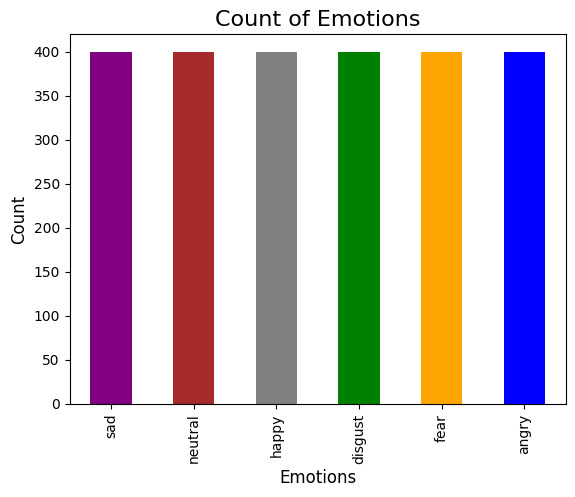

In [ ]:
ax = data_path['Emotions'].value_counts()
ax.plot(kind='bar', color=['purple', 'brown', 'gray', 'green', 'orange', 'blue', 'red', 'pink'])
plt.title('Count of Emotions', size=16)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.show()

#### Remove Surprise Emotion

In [10]:
data_path = data_path[data_path.Emotions != 'surprise']

In [ ]:
# data_path = data_path[data_path.Emotions != 'boredom']

In [11]:
data_path.Emotions.value_counts()

Emotions
neutral    808
happy      652
sad        652
angry      652
fear       652
disgust    652
Name: count, dtype: int64

#### Encoder the label

In [12]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the "Emotions" column
data_path['Emotions_encoded'] = label_encoder.fit_transform(data_path['Emotions'])

In [13]:
data_path.Emotions_encoded.value_counts()

Emotions_encoded
4    808
3    652
5    652
0    652
2    652
1    652
Name: count, dtype: int64

#### Save the data paths in a text file

In [ ]:
# creating Dataframe using all the 4 dataframes we created so far.
'''data_path = pd.concat([data_path], axis = 0)
data_path.to_csv("data_path2.csv",index=False)'''
data_path.head()

,Emotions,Path,Emotions_encoded
0,angry,/content/drive/MyDrive/GraduationProject/Data/...,0
1,happy,/content/drive/MyDrive/GraduationProject/Data/...,3
2,neutral,/content/drive/MyDrive/GraduationProject/Data/...,4
3,neutral,/content/drive/MyDrive/GraduationProject/Data/...,4
4,angry,/content/drive/MyDrive/GraduationProject/Data/...,0


#### check the balance

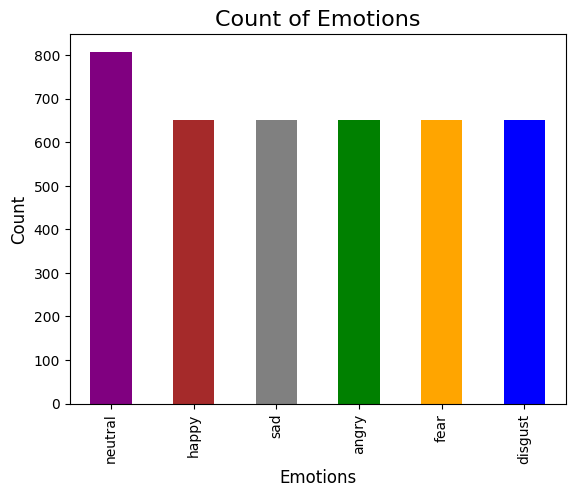

In [14]:
ax = data_path['Emotions'].value_counts()
ax.plot(kind='bar', color=['purple', 'brown', 'gray', 'green', 'orange', 'blue'])
plt.title('Count of Emotions', size=16)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.show()

#### visualize the audio

In [15]:
# waveplot for audio files

def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e}', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [16]:
# spectrogram for audio files

def create_spectrogram(data, sr, e):

    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))

    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {}'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

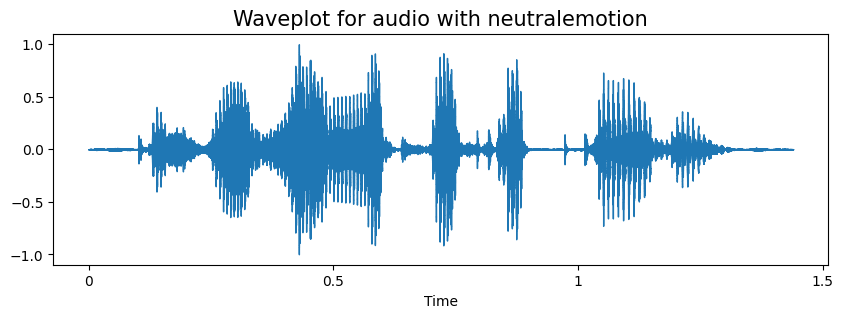

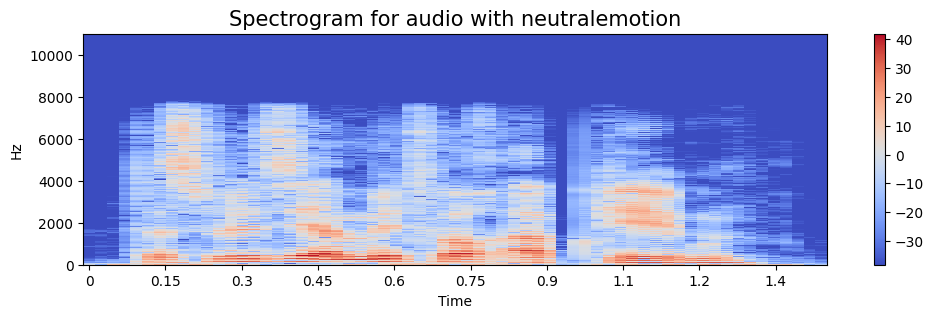

In [ ]:
emotion = 'neutral'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]

signal, samplerate = librosa.load(path)

title = emotion + 'emotion'
create_waveplot(signal, samplerate, title)

create_spectrogram(signal, samplerate, title)

Audio(path)

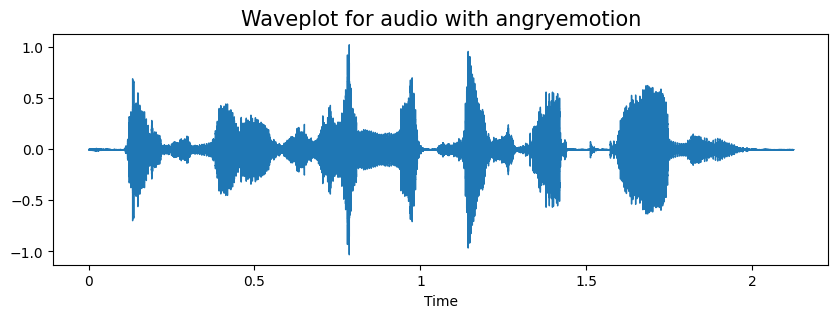

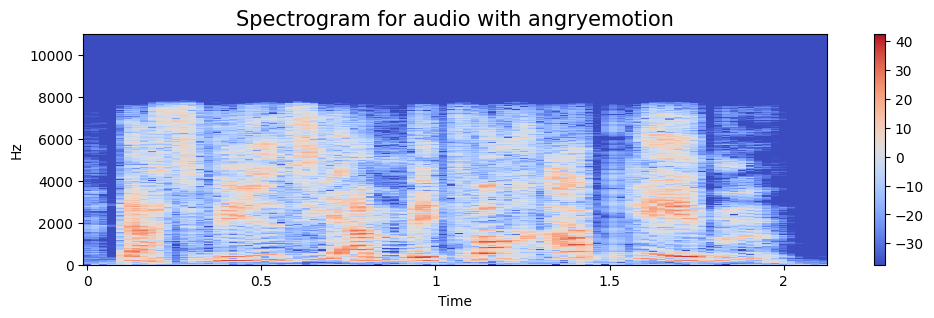

In [ ]:
emotion = 'angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]

signal, samplerate = librosa.load(path)

title = emotion + 'emotion'
create_waveplot(signal, samplerate, title)

create_spectrogram(signal, samplerate, title)

Audio(path)

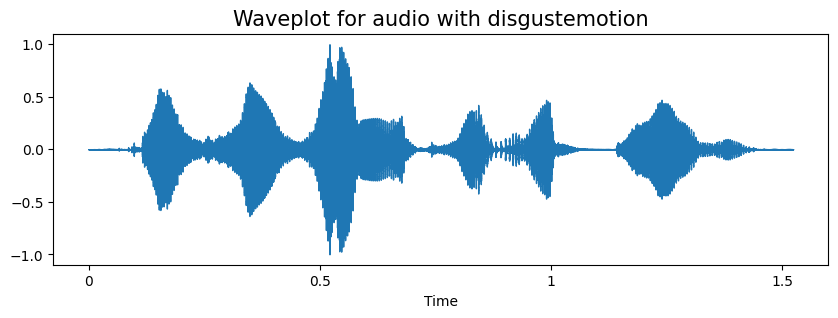

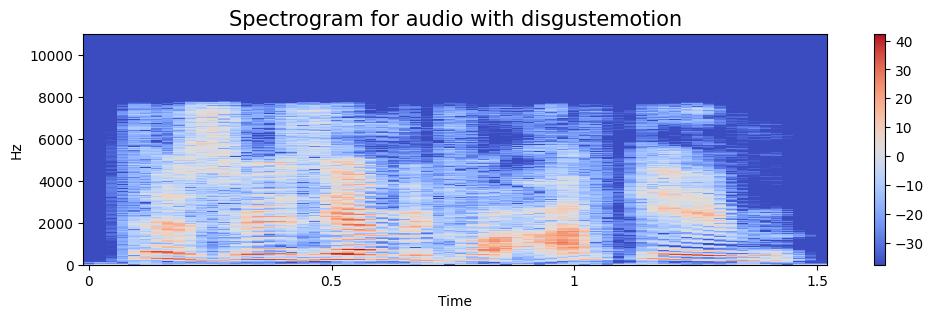

In [ ]:
emotion = 'disgust'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]

signal, samplerate = librosa.load(path)

title = emotion + 'emotion'
create_waveplot(signal, samplerate, title)

create_spectrogram(signal, samplerate, title)

Audio(path)

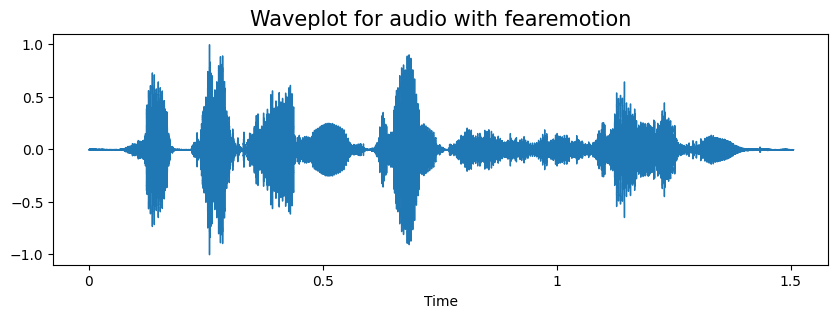

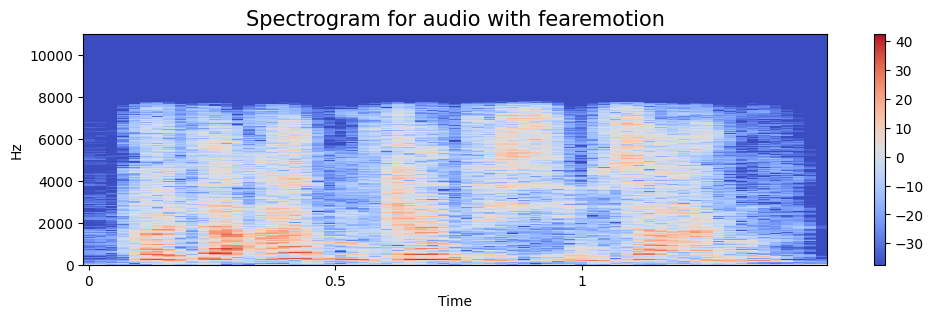

In [ ]:
emotion = 'fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]

signal, samplerate = librosa.load(path)

title = emotion + 'emotion'
create_waveplot(signal, samplerate, title)

create_spectrogram(signal, samplerate, title)

Audio(path)

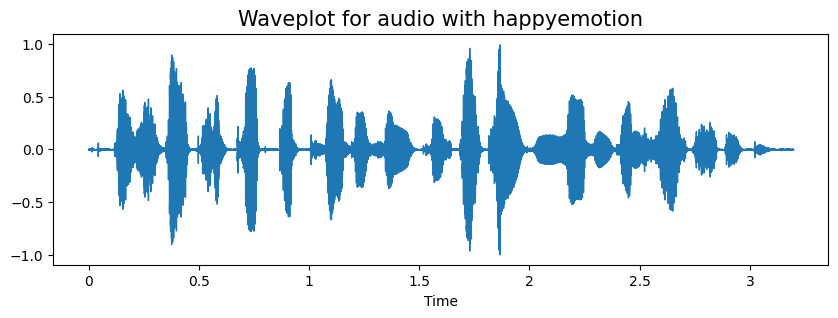

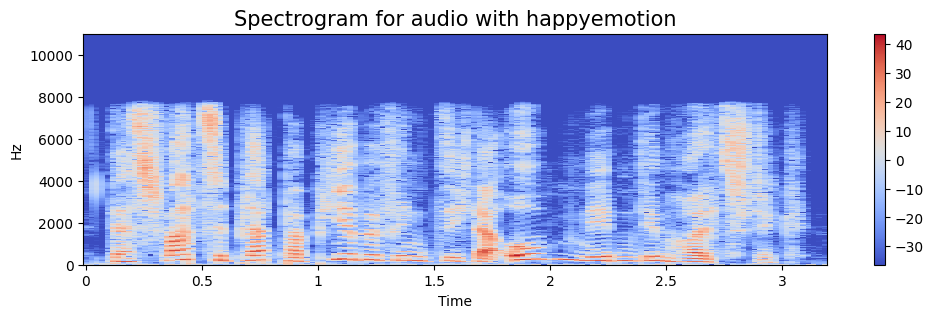

In [ ]:
emotion = 'happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]

signal, samplerate = librosa.load(path)

title = emotion + 'emotion'
create_waveplot(signal, samplerate, title)

create_spectrogram(signal, samplerate, title)

Audio(path)

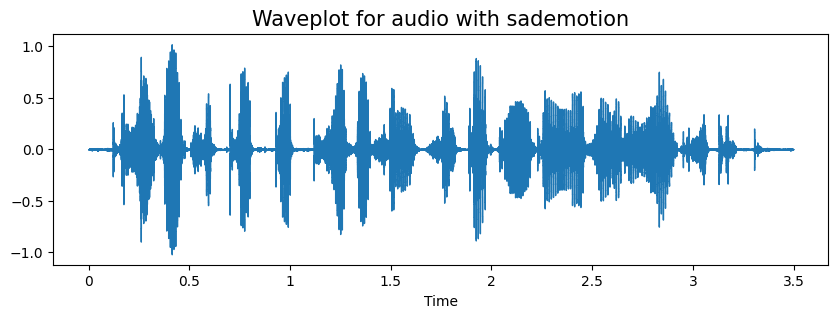

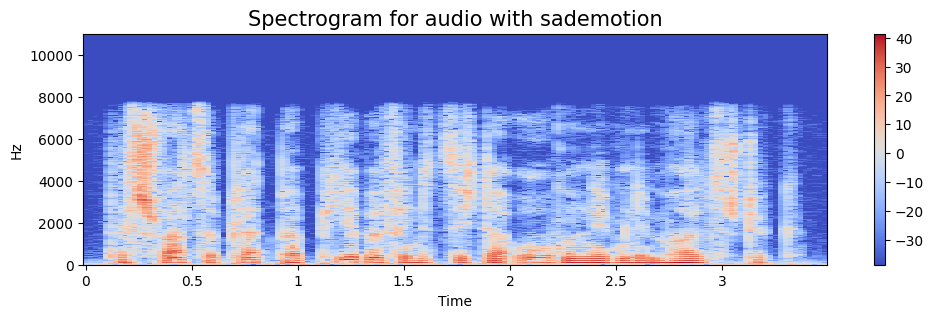

In [ ]:
emotion = 'sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]

signal, samplerate = librosa.load(path)

title = emotion + 'emotion'
create_waveplot(signal, samplerate, title)

create_spectrogram(signal, samplerate, title)

Audio(path)

#### check data formats

In [ ]:
path = np.array(data_path['Path'])[5]

signals, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
print(f"signals length: {len(signals)}")

signals length: 32272


#### Split the data

In [17]:
x = data_path.Path
y = data_path.Emotions_encoded

print(f"X length: {len(x)}")
print(f"Y length: {len(y)}")

X length: 4068
Y length: 4068


In [18]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# split the test set further into test and validation sets (50% test, 50% validation) -> (15% validation, 15% test)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [19]:
print(f"Train length: {len(X_train)}")
print(f"Validation length: {len(X_val)}")
print(f"Test length: {len(X_test)}")

Train length: 2847
Validation length: 611
Test length: 610


## Extract the features & Normalization

In [20]:
pip install audioflux

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.8/70.8 MB 13.1 MB/s eta 0:00:00


In [21]:
import audioflux as af
from audioflux.display import fill_spec

def GTCC(audio, sr):
    cc_arr, _ = af.gtcc(audio, samplate=sr, cc_num=13)
    return cc_arr

In [ ]:
def visialize_GTCC(audio_arr, sr, cc_arr):
    audio_len = audio_arr.shape[-1]
    x_coords = np.linspace(0, audio_len/sr, cc_arr.shape[-1] + 1)
    fig, ax = plt.subplots()
    img = fill_spec(cc_arr, axes=ax,
                    x_coords=x_coords, x_axis='time',
                    title='GTCC')
    fig.colorbar(img, ax=ax)

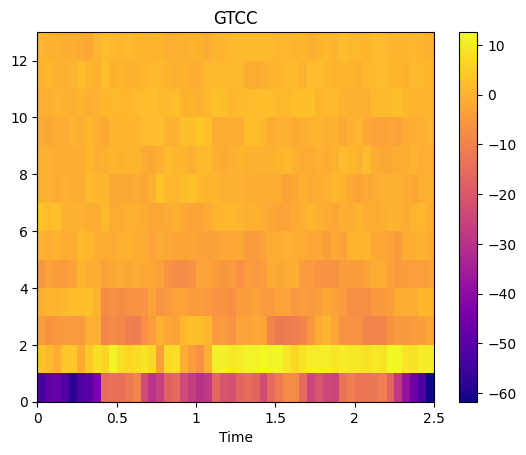

In [ ]:
path = np.array(data_path['Path'])[5]

signals, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

gtcc_result = GTCC(signals, sample_rate)

visialize_GTCC(signals, sample_rate, gtcc_result)

##### Extract Test Data

In [22]:
from concurrent.futures import ThreadPoolExecutor, as_completed

# Define the function to process each path
def process_path(path, emotion_encoded):
    results = []

    signal, sr = librosa.load(path) #, duration=2.5, offset=0.6

    GTCC_rs = np.mean(GTCC(signal, sr).T, axis=0)
    emotion_encoded = np.array(emotion_encoded)
    row1 = np.hstack((GTCC_rs, emotion_encoded)).reshape(1, -1)
    results.append(row1)

    return results

# Initialize the GTCCFE array
GTCCFE_Test = np.zeros((1, 14))

# Use ThreadPoolExecutor to process paths in parallel
with ThreadPoolExecutor() as executor:
    futures = [executor.submit(process_path, path, emotion_encoded)
               for path, emotion_encoded in zip(X_test, y_test)]

    for future in as_completed(futures):
        for row in future.result():
            GTCCFE_Test = np.vstack((GTCCFE_Test, row))

# Remove the initial row of zeros
GTCCFE_Test = GTCCFE_Test[1:]

print(GTCCFE_Test.shape)
print(GTCCFE_Test.dtype)

(610, 14)
float64


In [23]:
# Specify the file path where you want to save the CSV file
file_path = 'GTCCFE_Test.csv'

# Save the NumPy array to a CSV file
np.savetxt(file_path, GTCCFE_Test, delimiter=',')

In [24]:
print(GTCCFE_Test[0])

[-28.5272541   12.39830399   3.6524725   -0.88110447  -2.08247733
  -1.2149241   -0.52991349   0.44044971   1.52645874  -0.15609391
   0.67161459   0.38059127   0.7146669    5.        ]


In [25]:
# update X_test, and y_test

X_test = GTCCFE_Test[:, :-1]
y_test = GTCCFE_Test[:, -1]

#### Data Augmentation & Feature Extraction

##### Augmentation Methods

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

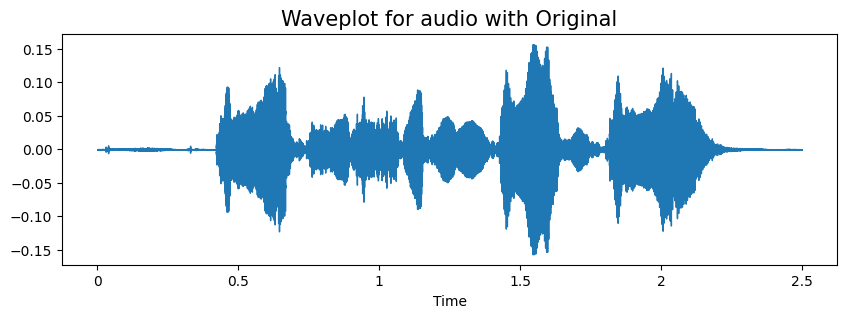

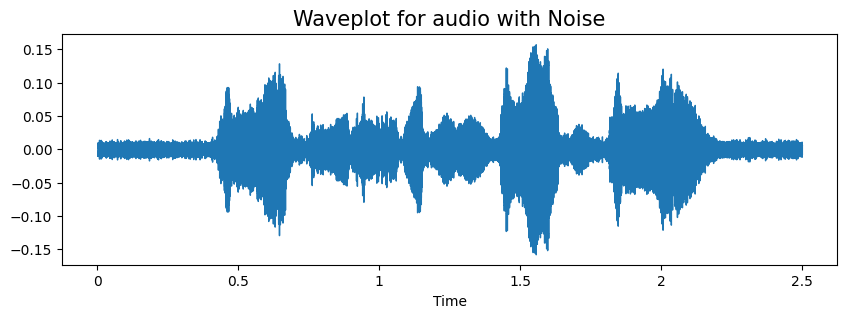

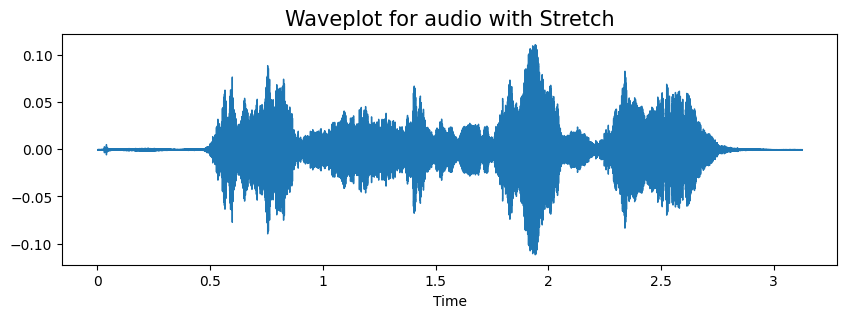

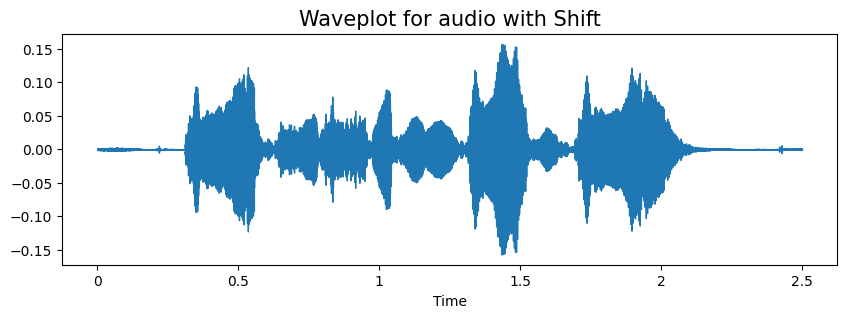

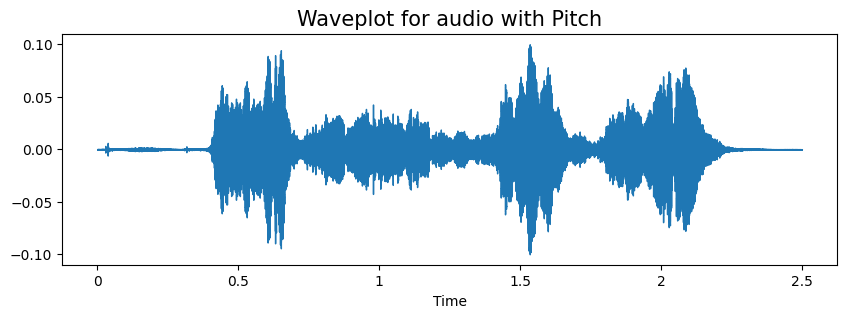

Emotion of the audio: happy


In [ ]:
path = np.array(data_path['Path'])[5]

signals, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
noise_signals = noise(signals)
stretch_signals = stretch(signals)
shift_signals = shift(signals)
pitch_signals = pitch(signals, sample_rate)

create_waveplot(signals, sample_rate, 'Original')
create_waveplot(noise_signals, sample_rate, 'Noise')
create_waveplot(stretch_signals, sample_rate, 'Stretch')
create_waveplot(shift_signals, sample_rate, 'Shift')
create_waveplot(pitch_signals, sample_rate, 'Pitch')

print(f"Emotion of the audio: {np.array(data_path['Emotions'])[5]}")
Audio(path)

##### Extract & Augmentate the audio data

In [26]:
# Define the function to process each path
def process_path(path, emotion_encoded):
    results = []

    signal, sr = librosa.load(path) #, duration=2.5, offset=0.6

    # Original
    GTCC_rs = np.mean(GTCC(signal, sr).T, axis=0)
    emotion_encoded = np.array(emotion_encoded)
    row1 = np.hstack((GTCC_rs, emotion_encoded)).reshape(1, -1)
    results.append(row1)

    '''# Noise
    noise_data = noise(signal)
    GTCC_rs = np.mean(GTCC(noise_data, sr).T, axis=0)
    row2 = np.hstack((GTCC_rs, emotion_encoded)).reshape(1, -1)
    results.append(row2)

    # Stretch + Pitch
    new_data = stretch(signal)
    data_stretch_pitch = pitch(new_data, sr)
    GTCC_rs = np.mean(GTCC(data_stretch_pitch, sr).T, axis=0)
    row3 = np.hstack((GTCC_rs, emotion_encoded)).reshape(1, -1)
    results.append(row3)'''

    return results

# Initialize the GTCCFE array
GTCCFE_val = np.zeros((1, 14))

# Use ThreadPoolExecutor to process paths in parallel
with ThreadPoolExecutor() as executor:
    futures = [executor.submit(process_path, path, emotion_encoded)
               for path, emotion_encoded in zip(X_val, y_val)]

    for future in as_completed(futures):
        for row in future.result():
            GTCCFE_val = np.vstack((GTCCFE_val, row))

# Remove the initial row of zeros
GTCCFE_val = GTCCFE_val[1:]

print(GTCCFE_val.shape)
print(GTCCFE_val.dtype)

(611, 14)
float64


In [27]:
# Specify the file path where you want to save the CSV file
file_path = 'GTCCFE_val.csv'

# Save the NumPy array to a CSV file
np.savetxt(file_path, GTCCFE_val, delimiter=',')

In [28]:
print(GTCCFE_val[0])

[-26.1175518   11.83007908   1.39311969  -0.9044531   -1.94896424
  -1.60354018  -0.2431943    1.36029851   1.55560756  -0.27189139
   0.50883043   0.30280474   0.77606511   5.        ]


In [29]:
# update X_val, and y_val

X_val = GTCCFE_val[:, :-1]
y_val = GTCCFE_val[:, -1]

##### Extract & Augmentate the Train Data

In [30]:
# Define the function to process each path
def process_path(path, emotion_encoded):
    results = []

    signal, sr = librosa.load(path) # , duration=2.5, offset=0.6

    # Original
    GTCC_rs = np.mean(GTCC(signal, sr).T, axis=0)
    emotion_encoded = np.array(emotion_encoded)
    row1 = np.hstack((GTCC_rs, emotion_encoded)).reshape(1, -1)
    results.append(row1)

    '''# Noise
    noise_data = noise(signal)
    GTCC_rs = np.mean(GTCC(noise_data, sr).T, axis=0)
    row2 = np.hstack((GTCC_rs, emotion_encoded)).reshape(1, -1)
    results.append(row2)

    # Stretch + Pitch
    new_data = stretch(signal)
    data_stretch_pitch = pitch(new_data, sr)
    GTCC_rs = np.mean(GTCC(data_stretch_pitch, sr).T, axis=0)
    row3 = np.hstack((GTCC_rs, emotion_encoded)).reshape(1, -1)
    results.append(row3)'''

    return results

# Initialize the GTCCFE array
GTCCFE_train = np.zeros((1, 14))

# Use ThreadPoolExecutor to process paths in parallel
with ThreadPoolExecutor() as executor:
    futures = [executor.submit(process_path, path, emotion_encoded)
               for path, emotion_encoded in zip(X_train, y_train)]

    for future in as_completed(futures):
        for row in future.result():
            GTCCFE_train = np.vstack((GTCCFE_train, row))

# Remove the initial row of zeros
GTCCFE_train = GTCCFE_train[1:]

print(GTCCFE_train.shape)
print(GTCCFE_train.dtype)

(2847, 14)
float64


In [31]:
# Specify the file path where you want to save the CSV file
file_path = 'GTCCFE_train.csv'

# Save the NumPy array to a CSV file
np.savetxt(file_path, GTCCFE_train, delimiter=',')

In [32]:
print(GTCCFE_train[0])

[-27.5413456   11.99339008   2.14412808  -0.63862115  -1.80413818
  -0.96511418   0.22879899   0.74630404   1.25670934  -0.16112557
   0.73366135   0.51979536   1.21402872   5.        ]


In [33]:
# update X_val, and y_val

X_train = GTCCFE_train[:, :-1]
y_train = GTCCFE_train[:, -1]

#### Process the Extracted Data

##### Replace the Nan values with Zero

In [34]:
# rplace nan values with 0

X_train = np.nan_to_num(X_train)
X_val = np.nan_to_num(X_val)
X_test = np.nan_to_num(X_test)

In [35]:
# Check if there are any NaN values in the data

print(f"Are there any NaN values in the training data? {np.isnan(X_train).any()}")
print(f"Are there any NaN values in the validation data? {np.isnan(X_val).any()}")
print(f"Are there any NaN values in the testing data? {np.isnan(X_test).any()}")

Are there any NaN values in the training data? False
Are there any NaN values in the validation data? False
Are there any NaN values in the testing data? False


##### Normalization

In [36]:
# Normalize features values
from sklearn.preprocessing import StandardScaler # , MinMaxScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Transform validation/test data with the same scaler
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

##### Check Data Formate

In [37]:
print("Train set:", X_train.shape, X_train[0].dtype, y_train.shape, y_train[0].dtype)
print("Validation set:", X_val.shape, X_val[0].dtype, y_val.shape, y_val[0].dtype)
print("Test set:", X_test.shape, X_test[0].dtype,  y_test.shape, y_test[0].dtype)

Train set: (2847, 13) float64 (2847,) float64
Validation set: (611, 13) float64 (611,) float64
Test set: (610, 13) float64 (610,) float64


In [38]:
y_train = y_train.astype(np.int64)
y_val = y_val.astype(np.int64)
y_test = y_test.astype(np.int64)

In [39]:
print("Train set: ", type(X_train), type(y_train))
print("Validation set: ", type(X_val), type(y_val))
print("Test set: ", type(X_test), type(y_test))

Train set:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Validation set:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Test set:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [40]:
print("Train set:", X_train.shape, X_train[0].dtype, y_train.shape, y_train[0].dtype)
print("Validation set:", X_val.shape, X_val[0].dtype, y_val.shape, y_val[0].dtype)
print("Test set:", X_test.shape, X_test[0].dtype,  y_test.shape, y_test[0].dtype)

Train set: (2847, 13) float64 (2847,) int64
Validation set: (611, 13) float64 (611,) int64
Test set: (610, 13) float64 (610,) int64


## Model Part

### Model Classes

In [41]:
class VIModule(nn.Module):
    """
    A mixin class to attach loss functions to layer. This is useful when doing variational inference with deep learning.
    """

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        # Define the internal losses
        self._internalLosses = []

        # Define the loss scale factor
        self.lossScaleFactor = 0.1


    # Posterior distribution

    # Add a loss function
    # This function will add a loss function to the current layer
    def addLoss(self, func):

        self._internalLosses.append(func)

    def evalLosses(self):

        t_loss = 0

        for layer_idx, layer in enumerate(self.layers):
            if isinstance(layer, VIModule):
                for func in layer._internalLosses:
                    t_loss = t_loss + func(layer)

        return t_loss * self.lossScaleFactor


In [42]:
class MeanFieldGaussianFeedForward(VIModule):
    """
    A feed forward layer with a Gaussian prior distribution and a Gaussian variational posterior.
    """

    def __init__(self,
                 in_features,
                 out_features,
                 bias=True,
                 groups=1,
                 weightPriorMean=0,
                 weightPriorSigma=0.1,
                 biasPriorMean=0,
                 biasPriorSigma=0.1,
                 initMeanZero=False,
                 initBiasMeanZero=False,
                 initPriorSigmaScale=0.01):

        super(MeanFieldGaussianFeedForward, self).__init__()

        # Define the samples
        self.samples = {'weights': None, 'bias': None, 'wNoiseState': None, 'bNoiseState': None}

        self.in_features = in_features
        self.out_features = out_features
        self.has_bias = bias


        # posterior distribution
        # Define the weights
        # Define the mean of the weights
        self.weights_mean = Parameter((0. if initMeanZero else 1.) * (torch.rand(out_features, int(in_features/groups)) - 0.5))
        # Define the log of the standard deviation of the weights
        self.lweights_sigma = Parameter(torch.log(initPriorSigmaScale * weightPriorSigma * torch.ones(out_features, int(in_features/groups))))
        # Define the noise source for the weights
        self.noiseSourceWeights = Normal(torch.zeros(out_features, int(in_features/groups)),
                                         torch.ones(out_features, int(in_features/groups)))

        # Add losses for the weights
        # 1. KL Divergence between the prior and the variational posterior
        # Calculate Negative log prior probapiltiy
        self.addLoss(lambda s: 0.5 * s.getSampledWeights().pow(2).sum() / weightPriorSigma**2)

        # 2. Entropy of the variational posterior (Gaussian entropy = 0.5 * log(2*pi*e) + 0.5 * log(sigma^2)
        # Represent Negative log prior probapiltiy based on Gaussian prior distribution
        self.addLoss(lambda s: -self.out_features/2 * np.log(2*np.pi) - 0.5 * s.samples['wNoiseState'].pow(2).sum() - s.lweights_sigma.sum())

        # Add losses for the bias
        if self.has_bias:
            # Define the mean of the bias
            self.bias_mean = Parameter((0. if initBiasMeanZero else 1.) * (torch.rand(out_features) - 0.5))
            # Define the log of the standard deviation of the bias
            self.lbias_sigma = Parameter(torch.log(initPriorSigmaScale * biasPriorSigma * torch.ones(out_features)))
            # Define the noise source for the bias
            self.noiseSourceBias = Normal(torch.zeros(out_features), torch.ones(out_features))

            # Add losses for the bias
            # 1. KL Divergence between the prior and the variational posterior
            self.addLoss(lambda s: 0.5 * s.getSampledBias().pow(2).sum() / biasPriorSigma**2)
            # 2. Entropy of the variational posterior
            self.addLoss(lambda s: -self.out_features/2 * np.log(2*np.pi) - 0.5 * s.samples['bNoiseState'].pow(2).sum() - s.lbias_sigma.sum())

    def sampleTransform(self, stochastic=True):
        # Sample the weights and bias

        # Sample the noise state
        # noise state = epsilon * sigma
        self.samples['wNoiseState'] = self.noiseSourceWeights.sample().to(device=self.weights_mean.device)
        # Compute the weights
        self.samples['weights'] = self.weights_mean + (torch.exp(self.lweights_sigma) * self.samples['wNoiseState'] if stochastic else 0)


        if self.has_bias:
            # Sample the noise state
            # noise state = epsilon * sigma
            self.samples['bNoiseState'] = self.noiseSourceBias.sample().to(device=self.bias_mean.device)
            # Compute the bias
            self.samples['bias'] = self.bias_mean + (torch.exp(self.lbias_sigma) * self.samples['bNoiseState'] if stochastic else 0)

    def getSampledWeights(self):
        return self.samples['weights']

    def getSampledBias(self):
        return self.samples['bias']

    def forward(self, x, stochastic=True):

        # Sample the weights and bias
        self.sampleTransform(stochastic=stochastic)

        # Perform the forward pass
        return nn.functional.linear(x, self.samples['weights'], bias=self.samples['bias'] if self.has_bias else None)


In [43]:

# Define the BayesianNetANN class which is a feed forward neural network with Bayesian layers

class BayesianNetANN(VIModule):
    def __init__(self,
                 input_size,
                 output_size,
                 linearWPriorSigma=1.,
                 linearBPriorSigma=5.,
                 p_mc_dropout=0.5):

        super().__init__()

        self.p_mc_dropout = p_mc_dropout
        # self.num_hidden_layers = num_hidden_layers
        # self.hidden_size = hidden_size

        # Define fully connected layers
        self.layers = nn.ModuleList()

        # Define fully connected layers

        self.layers.append(MeanFieldGaussianFeedForward(input_size, 64,
                                                    weightPriorSigma=linearWPriorSigma,
                                                    biasPriorSigma=linearBPriorSigma,
                                                    initPriorSigmaScale=1e-7))
        # Add batch normalization after each hidden layer
        self.layers.append(nn.BatchNorm1d(64))
        # hidden layer
        self.layers.append(MeanFieldGaussianFeedForward(64, 64,
                                                    weightPriorSigma=linearWPriorSigma,
                                                    biasPriorSigma=linearBPriorSigma,
                                                    initPriorSigmaScale=1e-7))

        # Add batch normalization after each hidden layer
        self.layers.append(nn.BatchNorm1d(64))

        # Add dropout layer
        if p_mc_dropout is not None:
            self.layers.append(nn.Dropout(p=p_mc_dropout))

        self.layers.append(MeanFieldGaussianFeedForward(64, 16,
                                                    weightPriorSigma=linearWPriorSigma,
                                                    biasPriorSigma=linearBPriorSigma,
                                                    initPriorSigmaScale=1e-7))

        # Add batch normalization after each hidden layer
        self.layers.append(nn.BatchNorm1d(16))

        # Add dropout layer
        if p_mc_dropout is not None:
            self.layers.append(nn.Dropout(p=p_mc_dropout))

        self.layers.append(MeanFieldGaussianFeedForward(16, 16,
                                                    weightPriorSigma=linearWPriorSigma,
                                                    biasPriorSigma=linearBPriorSigma,
                                                    initPriorSigmaScale=1e-7))
        # Add batch normalization after each hidden layer
        self.layers.append(nn.BatchNorm1d(16))

        # Add dropout layer
        if p_mc_dropout is not None:
            self.layers.append(nn.Dropout(p=p_mc_dropout))

        # output layer
        self.layers.append(MeanFieldGaussianFeedForward(16, output_size,
                                                    weightPriorSigma=linearWPriorSigma,
                                                    biasPriorSigma=linearBPriorSigma,
                                                    initPriorSigmaScale=1e-7))



    def forward(self, x, stochastic=True):
        # Flatten the input tensor
        x = x.view(x.size(0), -1)

        # Pass through fully connected layers
        for layer in self.layers[:-1]:
            x = nn.functional.relu(layer(x)) # , stochastic=stochastic)

        if self.p_mc_dropout is not None:
            x = nn.functional.dropout(x, p=self.p_mc_dropout, training=stochastic)  # MC-Dropout

        x = self.layers[-1](x, stochastic=stochastic)
        return nn.functional.log_softmax(x, dim=-1)


### Experimental Part

#### Data Preparation

In [44]:
def prepare_data(X_train, y_train, X_val, y_val, X_test, y_test, Batch_Size = 64):
    # Convert numpy arrays to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

    # Create DataLoader for training, validation, and test data
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=Batch_Size, shuffle=True)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    val_loader = DataLoader(val_dataset, batch_size=Batch_Size)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(test_dataset, batch_size=Batch_Size)

    return train_loader, val_loader, test_loader

#### Train Model

In [45]:
def train_model(model, train_loader, loss_f, optimizer, gradient_clip = 1.0):

    model.train()
    running_loss = 0.0
    for batch_id, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        # Forward pass
        pred = model(inputs)

        loss = loss_f(pred, labels)
        l = len(train_loader) * loss

        modelloss = model.evalLosses()
        l += modelloss

        '''print(f'Prediction valies: {pred}, \n Labels: {labels}, \n Loss: {loss}')
        print("--------------------------------------------------------------------")'''

        # Backward pass
        optimizer.zero_grad()
        l.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm = gradient_clip)  # Set max_norm to an appropriate value

        # Update weights
        optimizer.step()


        running_loss += l.item()

        # it calculate all model losses (postirioe Calculation (evalallLosses))
        # model = {:.4f}  modelloss, #.detach().cpu().item()
        '''print( ("\n\t\t Train step {}/{} prob = {:.4f} model = {:.4f}  loss = {:.4f} Train loss = {:.4f}        \n").format(
        batch_id+1,
        len(train_loader),
        # it calculates the exponential of the negative log-likelihood loss value.
        torch.exp(-loss.detach().cpu()).item(),
        modelloss,
        # it calculates the negative log-likelihood loss value.
        loss.detach().cpu().item(),
        running_loss/ len(train_loader)), end="")'''

    result = running_loss/ len(train_loader)
    return result


#### Validate the model

In [46]:

def validate_model(model, val_loader, loss_f): #, device):
    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for batch_id, (inputs, labels) in enumerate(val_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            pred = model(inputs)

            loss = loss_f(pred, labels)

            l = len(val_loader) * loss

            modelloss = model.evalLosses()
            l += modelloss

            val_loss += l.item()

            '''print( ("\n\t\t val loss = {:.4f} \n").format(
            val_loss/ len(val_loader)), end="")'''

    result = val_loss/ len(val_loader)
    return result

#### Test the model

In [47]:
y_pred = []
y_true = []

def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(labels.cpu().numpy())
            correct += (predicted == labels).sum().item()

    test_accuracy = correct / total
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    Classification_report = classification_report(y_true, y_pred)

    print("Test Accuracy:", test_accuracy)
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("\n Classification Report: \n", Classification_report)

#### Main Experimental Method

In [48]:
def main_experiment (Batch_Size = 64, num_epochs = 100): # , num_hidden_layers=10, hidden_size=128

    # prepare data
    train_loader, val_loader, test_loader = prepare_data(X_train, y_train, X_val, y_val, X_test, y_test, Batch_Size = Batch_Size)

    # inisialize model
    # Instantiate the model
    input_size = X_train.shape[1]
    # output_size = len(label_encoder.classes_)
    output_size = len(np.unique(y_train))

    # , num_hidden_layers=num_hidden_layers, hidden_size=hidden_size
    model = BayesianNetANN(input_size=input_size, output_size=output_size, p_mc_dropout=None) #p_mc_dropout=None will disable MC-Dropout for this bnn, as we found out it makes learning much much slower.
    model = model.to(device) # Transferring the model to a CUDA enabled GPU

    # Define the loss function
    # ELPO loss function which is the negative log-likelihood loss function
    loss_f =  nn.NLLLoss(reduction='mean') # nn.CrossEntropyLoss()  # or

    # Define the optimizer
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9) # , weight_decay=1e-4 # Adam(model.parameters(), lr=0.001) # with weight decay (L2 regularization)
    optimizer.zero_grad()
    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.1)


    # early stroping variables
    best_val_loss = float('inf')
    counter = 0
    patience = 10

    for epoch in range(num_epochs):

        # print(f"\nEpoch {epoch+1} of {num_epochs}")

        # Train the model
        train_loss = train_model(model, train_loader, loss_f, optimizer)

        # Validate the model
        val_loss = validate_model(model, val_loader, loss_f)

        print(f"\nAt End of Epoch {epoch+1} of {num_epochs}, Train Loss: {train_loss}, Validation Loss: {val_loss}")

        # Update learning rate scheduler
        scheduler.step(val_loss)

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print("\n")
                print(f'Early stopping after {epoch+1} epochs')
                break

        '''# Save the best model based on validation loss
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'PNCC_best_model.pth')'''

    # Test the model
    test_model(model, test_loader)

    # torch.save(model.state_dict(), 'PNCCmodel.pth')
    # return model


#### Run and test the model

In [49]:
# Batch_Size = 64, num_epochs = 100, num_hidden_layers=10, hidden_size=128
main_experiment(Batch_Size = 64, num_epochs = 500)


At End of Epoch 1 of 500, Train Loss: 10158.8388671875, Validation Loss: 10086.55517578125

At End of Epoch 2 of 500, Train Loss: 10138.049110243055, Validation Loss: 10080.0345703125

At End of Epoch 3 of 500, Train Loss: 10123.988216145834, Validation Loss: 10069.0904296875

At End of Epoch 4 of 500, Train Loss: 10110.33439670139, Validation Loss: 10064.032421875

At End of Epoch 5 of 500, Train Loss: 10097.76955295139, Validation Loss: 10053.681640625

At End of Epoch 6 of 500, Train Loss: 10087.803776041666, Validation Loss: 10051.93935546875

At End of Epoch 7 of 500, Train Loss: 10078.965625, Validation Loss: 10041.935546875

At End of Epoch 8 of 500, Train Loss: 10069.132747395834, Validation Loss: 10034.6578125

At End of Epoch 9 of 500, Train Loss: 10061.789670138889, Validation Loss: 10033.34423828125

At End of Epoch 10 of 500, Train Loss: 10054.7908203125, Validation Loss: 10028.03056640625

At End of Epoch 11 of 500, Train Loss: 10048.250737847222, Validation Loss: 10024.

##### Confussion Matrix

In [50]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm_plot_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']

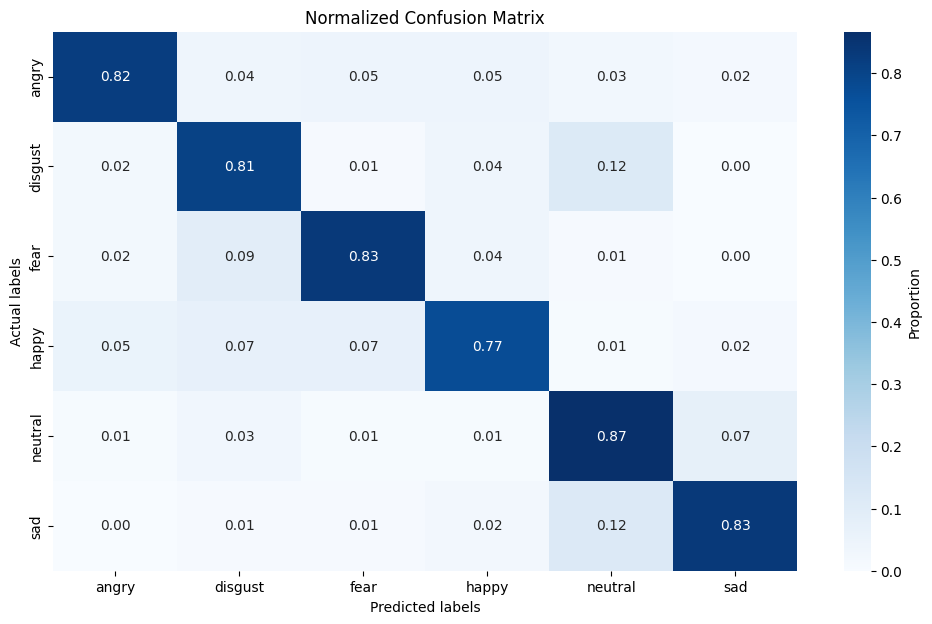

In [51]:

# Assuming y_true and y_pred are already defined, and cm_plot_labels contains the labels for the confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None],
                     index=[i for i in cm_plot_labels],
                     columns=[i for i in cm_plot_labels])

plt.figure(figsize=(12, 7))

# Create a heatmap with blue color map
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='.2f', cbar_kws={'label': 'Proportion'})

# Add labels to the axes
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Normalized Confusion Matrix')

# Save the figure
plt.savefig('output.png')

# Show the plot
plt.show()
